In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import datetime as dt
import os
import matplotlib.pyplot as plt
import phonecalls as pc
import scipy.stats as stats
import scipy.interpolate as interpol
import scipy as spy
import statsmodels.api as sm
import pymannkendall as mk
import time
import copy
import math
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.rcParams['figure.figsize'] = (20, 10)
markers = ['o', 'v', 's', 'P', '*', 'X', 'd', 'x', 'D', '2', '+']
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

data = {}
for i in range(5):
    data[['ukc', 'ukt', 'usc', 'ust', 'it'][i]] = pd.read_csv(f"data/{['UKc', 'UKt', 'USc', 'USt', 'IT'][i]}.txt", sep='\t', parse_dates=[3, 4])

In [2]:
t0 = dt.datetime.now()
weekdays = {}
for c in data.keys():
    df = data[c].copy(deep=True)
    df['weekday'] = df['date'].map(lambda i: i.day_name())
    weekdays[c] = {}
    for t in df['t'].unique():
        df1 = df.loc[df['t'] == t]
        weekdays[c][t] = df1.iloc[0]['weekday']

# UK

In [3]:
data['ukc1'] = data['ukc'].loc[data['ukc']['a']<100] #control the window day=100

In [5]:
data['ukc1'].head()

ego                alter                 pair  \
0  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
1  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
2  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
3  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
4  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   

                 time       date    t  a  
0 2007-09-28 22:19:00 2007-09-28  207  0  
1 2007-09-29 20:14:00 2007-09-29  208  1  
2 2007-09-30 19:43:00 2007-09-30  209  2  
3 2007-09-30 19:48:00 2007-09-30  209  2  
4 2007-09-30 19:48:00 2007-09-30  209  2

In [6]:
data['ukc1']['weekday'] = data['ukc1']['t'].map(lambda x: weekdays['ukc'][x])#find weekday
a = data['ukc1'].loc[(data['ukc1']['a']==0)].drop_duplicates(subset = ['pair'])#find the first dat enter the study
a.rename(columns={'weekday': 'weekday_start'}, inplace=True)
aa=a[['pair','weekday_start']]
merged = pd.merge(data['ukc1'], aa, left_on='pair', right_on='pair')

In [142]:
pd.options.display.max_rows = None
merged.head(50)

ego                alter                 pair  \
0   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
1   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
2   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
3   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
4   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
5   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
6   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
7   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
8   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
9   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
10  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
11  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
12  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
13  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
14  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
15  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
16  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
17  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
18  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
19  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
20  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
21  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
22  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
23  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
24  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
25  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
26  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
27  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
28  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
29  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
30  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
31  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
32  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
33  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
34  -0x2670406d6ac46a4e  -0x13e81c7688c918c8  -0x740fe03afafb1c1a   
35  -0x2670406d6ac46a4e  -0x13e81c7688c918c8  -0x740fe03afafb1c1a   
36  -0x2670406d6ac46a4e  -0x16f8a1cd365cd11d  -0x2ba0582ee11ba541   
37  -0x2670406d6ac46a4e  -0x17ceba4fb9f63796  -0x1b52533cbe7b6432   
38  -0x2670406d6ac46a4e  -0x18b6185b4920e6e9   0x1c7afe32517128e8   
39  -0x2670406d6ac46a4e  -0x18b6185b4920e6e9   0x1c7afe32517128e8   
40  -0x2670406d6ac46a4e  -0x1ccfbb3d30d2c3de   0x4b94151e3aa152d6   
41  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   
42  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   
43  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   
44  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   
45  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   
46  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   
47  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   
48  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   
49  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   

                  time       date    t   a    weekday weekday_start  
0  2007-09-28 22:19:00 2007-09-28  207   0     Friday        Friday  
1  2007-09-29 20:14:00 2007-09-29  208   1   Saturday        Friday  
2  2007-09-30 19:43:00 2007-09-30  209   2     Sunday        Friday  
3  2007-09-30 19:48:00 2007-09-30  209   2     Sunday        Friday  
4  2007-09-30 19:48:00 2007-09-30  209   2     Sunday        Friday  
5  2007-09-30 20:19:00 2007-09-30  209   2     Sunday        Friday  
6  2007-09

In [7]:
merged['weekday_new'] = np.where(merged['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'weekday','weekend')
merged['weekday_start_new'] = np.where(merged['weekday_start'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'weekday','weekend')

In [144]:
merged.head(50)

ego                alter                 pair  \
0   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
1   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
2   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
3   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
4   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
5   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
6   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
7   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
8   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
9   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
10  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
11  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
12  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
13  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
14  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
15  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
16  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
17  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
18  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
19  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
20  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
21  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
22  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
23  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
24  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
25  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
26  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
27  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
28  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
29  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
30  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
31  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
32  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
33  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
34  -0x2670406d6ac46a4e  -0x13e81c7688c918c8  -0x740fe03afafb1c1a   
35  -0x2670406d6ac46a4e  -0x13e81c7688c918c8  -0x740fe03afafb1c1a   
36  -0x2670406d6ac46a4e  -0x16f8a1cd365cd11d  -0x2ba0582ee11ba541   
37  -0x2670406d6ac46a4e  -0x17ceba4fb9f63796  -0x1b52533cbe7b6432   
38  -0x2670406d6ac46a4e  -0x18b6185b4920e6e9   0x1c7afe32517128e8   
39  -0x2670406d6ac46a4e  -0x18b6185b4920e6e9   0x1c7afe32517128e8   
40  -0x2670406d6ac46a4e  -0x1ccfbb3d30d2c3de   0x4b94151e3aa152d6   
41  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   
42  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   
43  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   
44  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   
45  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   
46  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   
47  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   
48  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   
49  -0x2670406d6ac46a4e  -0x1e94d21d56a4023d   0x624dc842e2566945   

                  time       date    t   a    weekday weekday_start  \
0  2007-09-28 22:19:00 2007-09-28  207   0     Friday        Friday   
1  2007-09-29 20:14:00 2007-09-29  208   1   Saturday        Friday   
2  2007-09-30 19:43:00 2007-09-30  209   2     Sunday        Friday   
3  2007-09-30 19:48:00 2007-09-30  209   2     Sunday        Friday   
4  2007-09-30 19:48:00 2007-09-30  209   2     Sunday        Friday   
5  2007-09-30 20:19:00 2007-09-30  209   2     Sunday        Friday   
6  

In [145]:
merged.groupby('weekday_start_new').size()

weekday_start_new
weekday    33622
weekend     9831
dtype: int64

In [146]:
merged.groupby(['weekday_start_new','weekday_new']).size()

weekday_start_new  weekday_new
weekday            weekday        27318
                   weekend         6304
weekend            weekday         5423
                   weekend         4408
dtype: int64

In [8]:

from decimal import *
size =merged.groupby(['weekday_start_new','weekday_new']).agg(['count'])
size_t = size['t']


for index, row in size_t.iterrows():
    if index in [('weekday', 'weekday'),('weekend', 'weekday')]:
        row['count']=row['count']/5
    else:
        row['count']=row['count']/2

size_t['Prob'] = ''

sum1 = size_t.loc[size_t.index ==('weekday', 'weekday'),'count'].squeeze()+size_t.loc[size_t.index ==('weekday', 'weekend'),'count'].squeeze()
sum2 = size_t.loc[size_t.index ==('weekend', 'weekday'),'count'].squeeze()+size_t.loc[size_t.index ==('weekend', 'weekend'),'count'].squeeze()

v1 = size_t.loc[size_t.index ==('weekday', 'weekday'),'count']
v2 = size_t.loc[size_t.index ==('weekday', 'weekend'),'count']
v3 = size_t.loc[size_t.index ==('weekend', 'weekday'),'count']
v4 = size_t.loc[size_t.index ==('weekend', 'weekend'),'count']

size_t.loc[size_t.index ==('weekday', 'weekday'),'Prob'] = v1/sum1
size_t.loc[size_t.index ==('weekday', 'weekend'),'Prob'] = v2/sum1
size_t.loc[size_t.index ==('weekend', 'weekday'),'Prob'] = v3/sum2
size_t.loc[size_t.index ==('weekend', 'weekend'),'Prob'] = v4/sum2
       
size_t.head()

count      Prob
weekday_start_new weekday_new                 
weekday           weekday       5463  0.634127
                  weekend       3152  0.365873
weekend           weekday       1084  0.329684
                  weekend       2204  0.670316

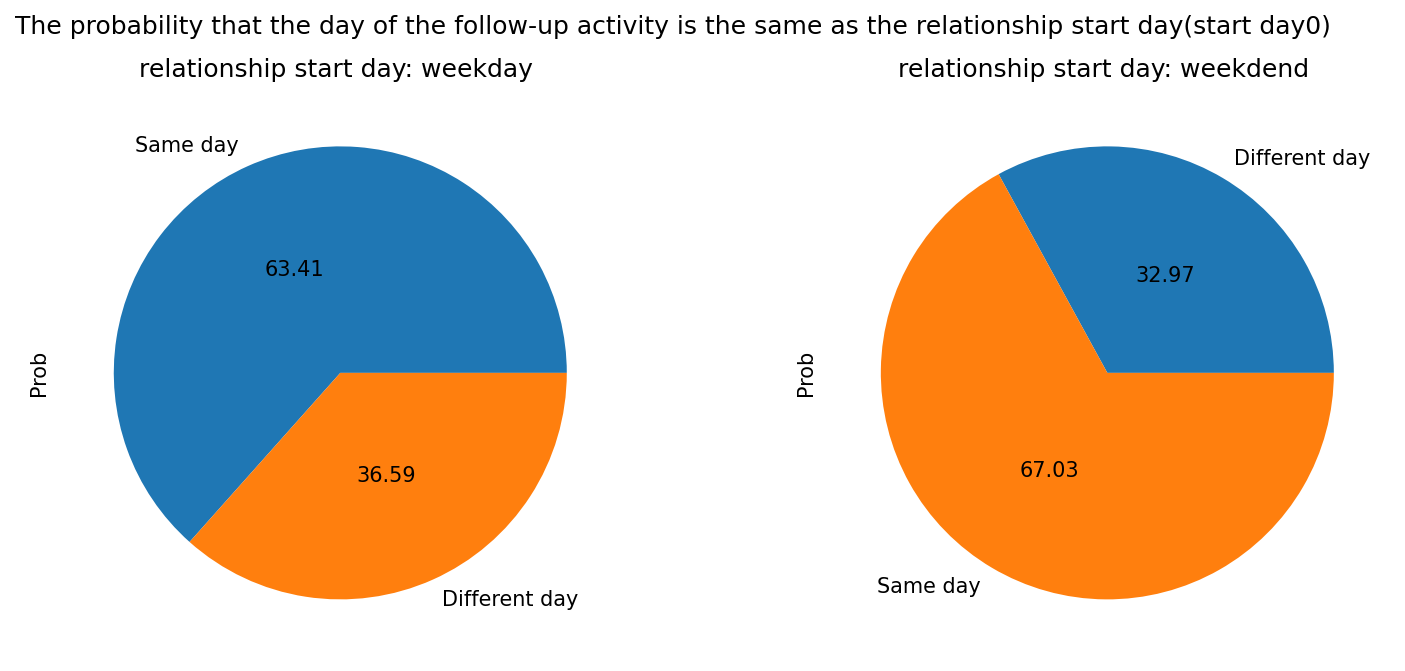

In [9]:
from matplotlib.pyplot import figure

labels1 = ['Same day','Different day'] 
labels2 = ['Different day','Same day'] 
figure(figsize=(30, 30), dpi=150)  
plt.suptitle('The probability that the day of the follow-up activity is the same as the relationship start day(start day0) ',x=1)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.title('relationship start day: weekday ')
size_t.loc[(size_t.index == ('weekday', 'weekday')) | (size_t.index ==('weekday', 'weekend')),'Prob'].plot.pie(y='Prob', figsize=(5, 5),  labels = labels1, autopct='%.2f', pctdistance=0.5, labeldistance=1.1)

plt.subplot(1, 2, 2) # index 2
size_t.loc[(size_t.index == ('weekend', 'weekday')) | (size_t.index ==('weekend', 'weekend')),'Prob'].plot.pie(y='Prob', figsize=(5, 5), labels = labels2,autopct='%.2f', pctdistance=0.5, labeldistance=1.1)
plt.title('relationship start day: weekdend ')

plt.subplots_adjust(right = 2)
plt.show()


In [149]:
r1, r2 = size_t.iloc[2], size_t.iloc[3]
temp = size_t.iloc[2].copy()
size_t.iloc[2] = r2
size_t.iloc[3] = temp
size_t.head()

count      Prob
weekday_start_new weekday_new                 
weekday           weekday       5463  0.634127
                  weekend       3152  0.365873
weekend           weekday       2204  0.670316
                  weekend       1084  0.329684

In [12]:
def addlabels1(y):
    for i in ind:
        plt.text(i,y[i]/2,round(y[i], 2))

In [13]:
def addlabels2(y):
    for i in ind:
        plt.text(i+width,y[i]/2,round(y[i], 2))

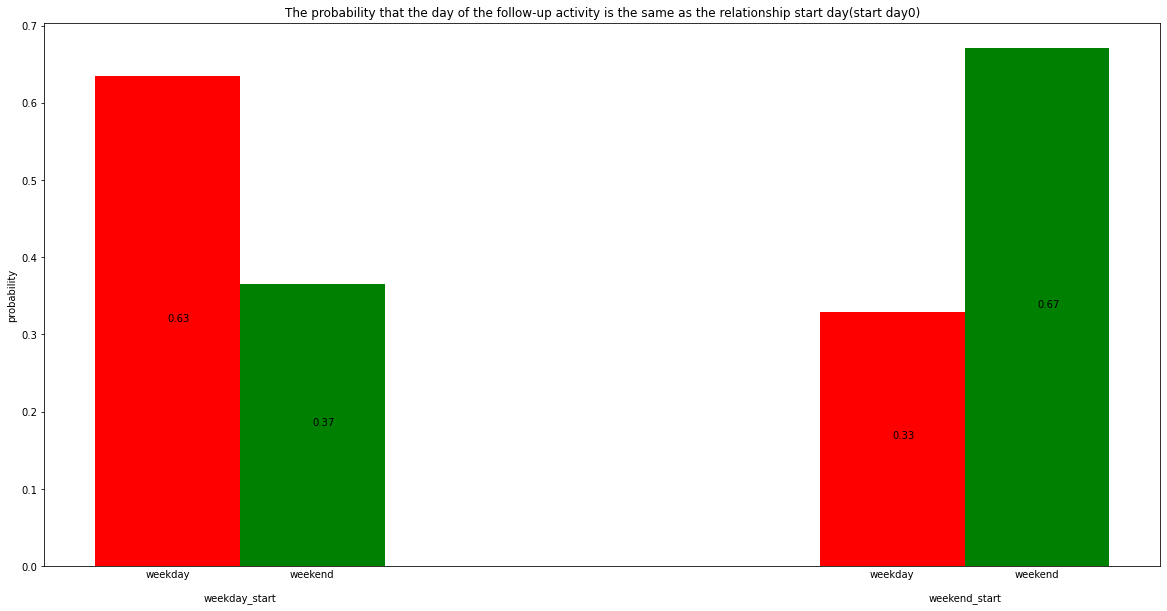

In [14]:
ind = np.arange(2)
width = .2 

x = list()
# x labels position: i = 1st bar, i+w/2 = category, i+w = 2nd bar
for i in ind:
    x.extend([i, i+width/2., i+width])   
 
# plot bars
fig = plt.figure()
ax = fig.add_subplot(111)
y_1 = list(size_t.loc[(size_t.index == ('weekday', 'weekday')) | (size_t.index ==('weekend', 'weekday')),'Prob'])
y_2 = list(size_t.loc[(size_t.index == ('weekend', 'weekend')) | (size_t.index ==('weekday', 'weekend')),'Prob'])
rects1 = ax.bar(ind, y_1, width, color='r', align = 'center')
rects2 = ax.bar(ind+width, y_2, width, color='g', align = 'center')
plt.title('The probability that the day of the follow-up activity is the same as the relationship start day(start day0)')
# set ticks and labels
plt.xticks(x)
plt.ylabel('probability')
ax.set_xticklabels(('weekday','\n\nweekday_start', 'weekend', 'weekday','\n\nweekend_start', 'weekend'),ha='center')
# hide tick lines for x axis
ax.tick_params(axis='x', which='both',length=0)
addlabels1(y = y_1)
addlabels2(y = y_2)
plt.show()

# UK_200

In [15]:
b = a.loc[a['t'] >=200,'pair']
merged_new = merged[merged['pair'].isin(b)]
merged_new.head()

ego                alter                 pair  \
0  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
1  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
2  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
3  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
4  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   

                 time       date    t  a   weekday weekday_start weekday_new  \
0 2007-09-28 22:19:00 2007-09-28  207  0    Friday        Friday     weekday   
1 2007-09-29 20:14:00 2007-09-29  208  1  Saturday        Friday     weekend   
2 2007-09-30 19:43:00 2007-09-30  209  2    Sunday        Friday     weekend   
3 2007-09-30 19:48:00 2007-09-30  209  2    Sunday        Friday     weekend   
4 2007-09-30 19:48:00 2007-09-30  209  2    Sunday        Friday     weekend   

  weekday_start_new  
0           weekday  
1           weekday  
2           weekday  
3           weekday  
4           weekday

In [154]:
merged_new.groupby('weekday_start_new').size()

weekday_start_new
weekday    14585
weekend     4743
dtype: int64

In [155]:
merged_new.groupby(['weekday_start_new','weekday_new']).size()

weekday_start_new  weekday_new
weekday            weekday        12291
                   weekend         2294
weekend            weekday         2617
                   weekend         2126
dtype: int64

In [16]:
from decimal import *
size =merged_new.groupby(['weekday_start_new','weekday_new']).agg(['count'])
size_t = size['t']


for index, row in size_t.iterrows():
    if index in [('weekday', 'weekday'),('weekend', 'weekday')]:
        row['count']=row['count']/5
    else:
        row['count']=row['count']/2

size_t['Prob'] = ''

sum1 = size_t.loc[size_t.index ==('weekday', 'weekday'),'count'].squeeze()+size_t.loc[size_t.index ==('weekday', 'weekend'),'count'].squeeze()
sum2 = size_t.loc[size_t.index ==('weekend', 'weekday'),'count'].squeeze()+size_t.loc[size_t.index ==('weekend', 'weekend'),'count'].squeeze()

v1 = size_t.loc[size_t.index ==('weekday', 'weekday'),'count']
v2 = size_t.loc[size_t.index ==('weekday', 'weekend'),'count']
v3 = size_t.loc[size_t.index ==('weekend', 'weekday'),'count']
v4 = size_t.loc[size_t.index ==('weekend', 'weekend'),'count']

size_t.loc[size_t.index ==('weekday', 'weekday'),'Prob'] = v1/sum1
size_t.loc[size_t.index ==('weekday', 'weekend'),'Prob'] = v2/sum1
size_t.loc[size_t.index ==('weekend', 'weekday'),'Prob'] = v3/sum2
size_t.loc[size_t.index ==('weekend', 'weekend'),'Prob'] = v4/sum2
       
size_t.head()

count      Prob
weekday_start_new weekday_new                 
weekday           weekday       2458  0.681831
                  weekend       1147  0.318169
weekend           weekday        523   0.32976
                  weekend       1063   0.67024

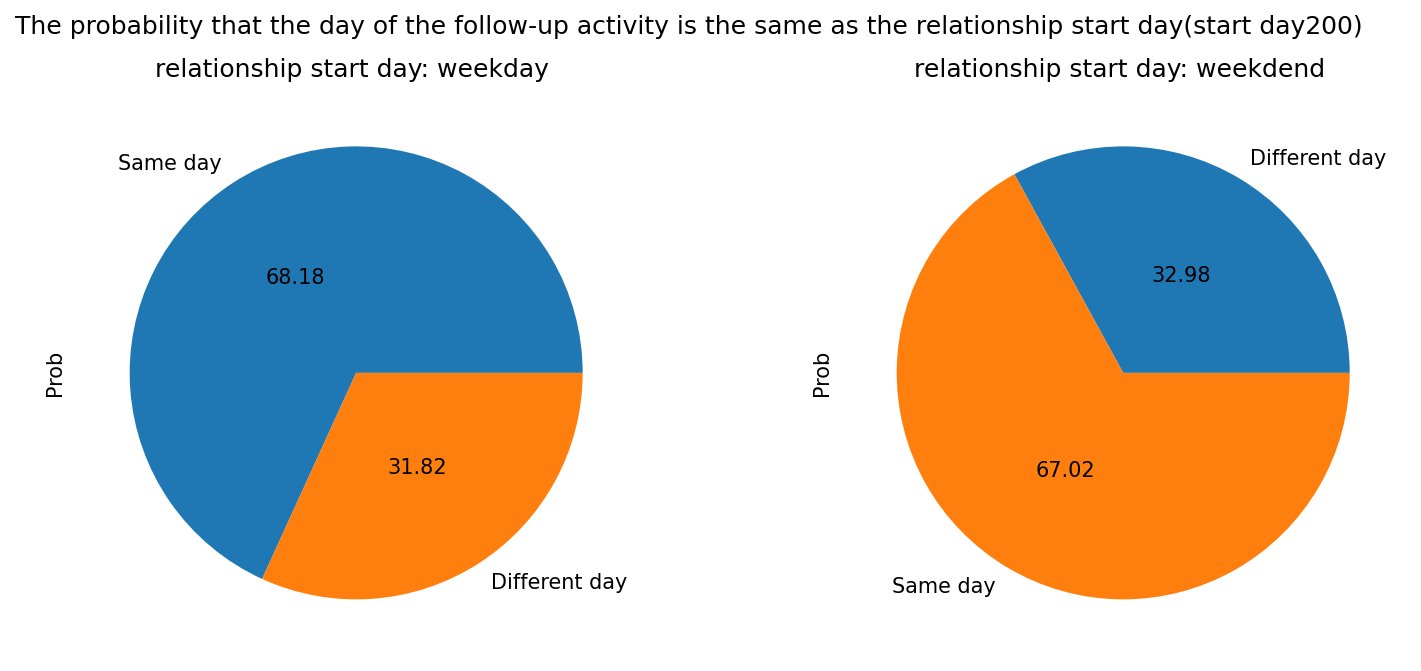

In [17]:
from matplotlib.pyplot import figure

labels1 = ['Same day','Different day'] 
labels2 = ['Different day','Same day'] 
figure(figsize=(30, 30), dpi=150)  
plt.suptitle('The probability that the day of the follow-up activity is the same as the relationship start day(start day200) ',x=1)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.title('relationship start day: weekday ')
size_t.loc[(size_t.index == ('weekday', 'weekday')) | (size_t.index ==('weekday', 'weekend')),'Prob'].plot.pie(y='Prob', figsize=(5, 5),  labels = labels1, autopct='%.2f', pctdistance=0.5, labeldistance=1.1)

plt.subplot(1, 2, 2) # index 2
size_t.loc[(size_t.index == ('weekend', 'weekday')) | (size_t.index ==('weekend', 'weekend')),'Prob'].plot.pie(y='Prob', figsize=(5, 5), labels = labels2,autopct='%.2f', pctdistance=0.5, labeldistance=1.1)
plt.title('relationship start day: weekdend ')

plt.subplots_adjust(right = 2)
plt.show()

In [18]:
r1, r2 = size_t.iloc[2], size_t.iloc[3]
temp = size_t.iloc[2].copy()
size_t.iloc[2] = r2
size_t.iloc[3] = temp
size_t.head()

count      Prob
weekday_start_new weekday_new                 
weekday           weekday       2458  0.681831
                  weekend       1147  0.318169
weekend           weekday       1063   0.67024
                  weekend        523   0.32976

In [19]:
def addlabels1(y):
    for i in ind:
        plt.text(i,y[i]/2,round(y[i], 2))

In [20]:
def addlabels2(y):
    for i in ind:
        plt.text(i+width,y[i]/2,round(y[i], 2))

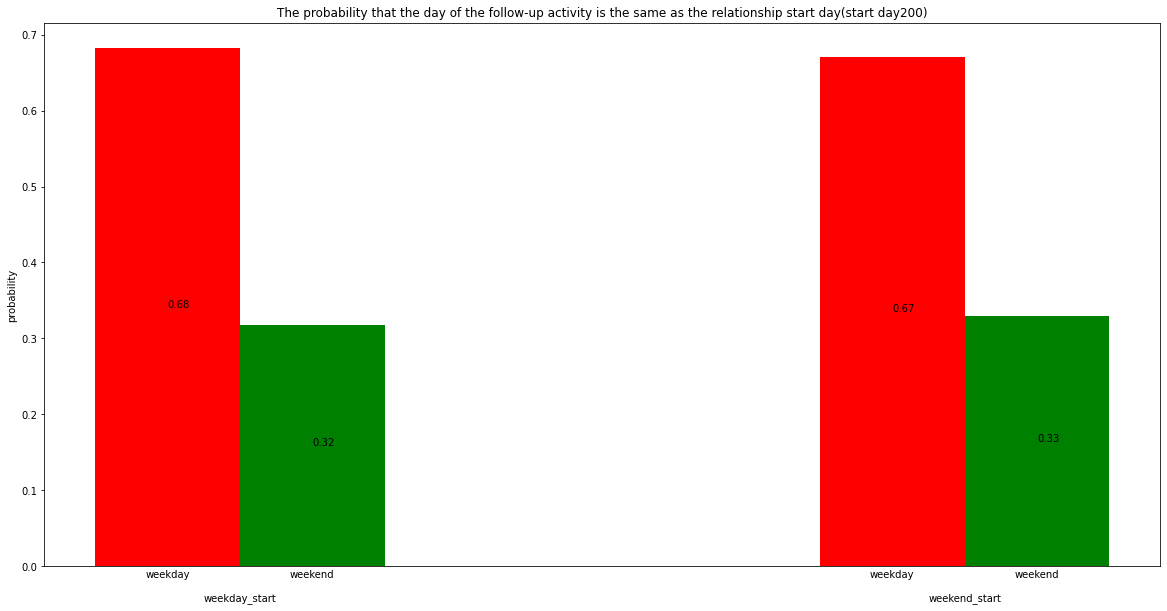

In [21]:
ind = np.arange(2)
width = .2 

x = list()
# x labels position: i = 1st bar, i+w/2 = category, i+w = 2nd bar
for i in ind:
    x.extend([i, i+width/2., i+width])   
 
# plot bars
fig = plt.figure()
ax = fig.add_subplot(111)
y_1 = list(size_t.loc[(size_t.index == ('weekday', 'weekday')) | (size_t.index ==('weekend', 'weekday')),'Prob'])
y_2 = list(size_t.loc[(size_t.index == ('weekend', 'weekend')) | (size_t.index ==('weekday', 'weekend')),'Prob'])
rects1 = ax.bar(ind, y_1, width, color='r', align = 'center')
rects2 = ax.bar(ind+width, y_2, width, color='g', align = 'center')
plt.title('The probability that the day of the follow-up activity is the same as the relationship start day(start day200)')
# set ticks and labels
plt.xticks(x)
plt.ylabel('probability')
ax.set_xticklabels(('weekday','\n\nweekday_start', 'weekend', 'weekday','\n\nweekend_start', 'weekend'),ha='center')
# hide tick lines for x axis
ax.tick_params(axis='x', which='both',length=0)
addlabels1(y = y_1)
addlabels2(y = y_2)
plt.show()

# Personality

In [5]:
data['ukc1'] = data['ukc']#.loc[data['ukc']['a']<100] #control the window day=100

In [7]:
data['ukc1'].head()

ego                alter                 pair  \
0  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
1  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
2  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
3  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
4  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   

                 time       date    t  a  
0 2007-09-28 22:19:00 2007-09-28  207  0  
1 2007-09-29 20:14:00 2007-09-29  208  1  
2 2007-09-30 19:43:00 2007-09-30  209  2  
3 2007-09-30 19:48:00 2007-09-30  209  2  
4 2007-09-30 19:48:00 2007-09-30  209  2

In [7]:
data['ukc1']['weekday'] = data['ukc1']['t'].map(lambda x: weekdays['ukc'][x])#find weekday
a = data['ukc1'].loc[(data['ukc1']['a']==0)].drop_duplicates(subset = ['pair'])#find the first dat enter the study
b = data['ukc'].groupby('pair').size().rename_axis('pair').reset_index(name='ncall')
ab = pd.merge(a, b, left_on='pair', right_on='pair')

ab.rename(columns={'weekday': 'weekday_start'}, inplace=True)
aa=ab[['pair','weekday_start','ncall']]
merged = pd.merge(data['ukc1'], aa, left_on='pair', right_on='pair')

merged.head()

ego                alter                 pair  \
0  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
1  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
2  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
3  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
4  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   

                 time       date    t  a   weekday weekday_start  ncall  
0 2007-09-28 22:19:00 2007-09-28  207  0    Friday        Friday     20  
1 2007-09-29 20:14:00 2007-09-29  208  1  Saturday        Friday     20  
2 2007-09-30 19:43:00 2007-09-30  209  2    Sunday        Friday     20  
3 2007-09-30 19:48:00 2007-09-30  209  2    Sunday        Friday     20  
4 2007-09-30 19:48:00 2007-09-30  209  2    Sunday        Friday     20

In [11]:
b.head()

pair  ncall
0  -0x1001c9a3bad40086      1
1   -0x100751903979ad4      1
2  -0x100b6b231528eb78      2
3   -0x1017dd3b82bb3df      3
4  -0x101c495896b4f6c6     17

In [12]:
pd.options.display.max_rows = None
merged.head(50)

ego                alter                 pair  \
0   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
1   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
2   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
3   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
4   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
5   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
6   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
7   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
8   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
9   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
10  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
11  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
12  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
13  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
14  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
15  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
16  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
17  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
18  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
19  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
20  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
21  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
22  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
23  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
24  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
25  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
26  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
27  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
28  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
29  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
30  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
31  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
32  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
33  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
34  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
35  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
36  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
37  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
38  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
39  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
40  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
41  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
42  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
43  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
44  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
45  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
46  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
47  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
48  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
49  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   

                  time       date    t    a    weekday weekday_start  ncall  
0  2007-09-28 22:19:00 2007-09-28  207    0     Friday        Friday     20  
1  2007-09-29 20:14:00 2007-09-29  208    1   Saturday        Friday     20  
2  2007-09-30 19:43:00 2007-09-30  209    2     Sunday        Friday     20  
3  2007-09-30 19:48:00 2007-09-30  209    2     Sunday        Friday     20  
4  2007-09-30 19:48:00 2007-09-30  209    2     Sunday        Friday     20  
5  2007-09-30 20:19:00 2007-09-3

In [8]:
merged['weekday_new'] = np.where(merged['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'weekday','weekend')
merged['weekday_start_new'] = np.where(merged['weekday_start'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'weekday','weekend')

In [9]:
merged.head(50)

ego                alter                 pair  \
0   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
1   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
2   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
3   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
4   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
5   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
6   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
7   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
8   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
9   -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
10  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
11  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
12  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
13  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
14  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
15  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
16  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
17  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
18  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
19  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
20  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
21  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
22  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
23  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
24  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
25  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
26  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
27  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
28  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
29  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
30  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
31  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
32  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
33  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
34  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
35  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
36  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
37  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
38  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
39  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
40  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
41  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
42  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
43  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
44  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
45  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
46  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
47  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
48  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   
49  -0x2670406d6ac46a4e  -0x132dc4ffe31048c3  -0x14ea2a5a00156840   

                  time       date    t    a    weekday weekday_start  ncall  \
0  2007-09-28 22:19:00 2007-09-28  207    0     Friday        Friday     20   
1  2007-09-29 20:14:00 2007-09-29  208    1   Saturday        Friday     20   
2  2007-09-30 19:43:00 2007-09-30  209    2     Sunday        Friday     20   
3  2007-09-30 19:48:00 2007-09-30  209    2     Sunday        Friday     20   
4  2007-09-30 19:48:00 2007-09-30  209    2     Sunday        Friday     20   
5  2007-09-30 20:19:00 200

In [15]:
merged.loc[merged['weekday_new']==merged['weekday_start_new'],'Same day']=1
merged.loc[merged['weekday_new']!=merged['weekday_start_new'],'Same day']=0

In [16]:
merged.head()

ego                alter                 pair  \
0  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
1  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
2  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
3  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
4  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   

                 time       date    t  a   weekday weekday_start  ncall  \
0 2007-09-28 22:19:00 2007-09-28  207  0    Friday        Friday     20   
1 2007-09-29 20:14:00 2007-09-29  208  1  Saturday        Friday     20   
2 2007-09-30 19:43:00 2007-09-30  209  2    Sunday        Friday     20   
3 2007-09-30 19:48:00 2007-09-30  209  2    Sunday        Friday     20   
4 2007-09-30 19:48:00 2007-09-30  209  2    Sunday        Friday     20   

  weekday_new weekday_start_new  Same day  
0     weekday           weekday       1.0  
1     weekend           weekday       0.0  
2     weekend           weekday       0.0  
3     weekend           weekday       0.0  
4     weekend           weekday       0.0

In [17]:
df2 = merged['Same day'].groupby(merged['pair']).agg(['sum'])
df2

sum
pair                       
-0x1001c9a3bad40086     1.0
-0x100751903979ad4      1.0
-0x100b6b231528eb78     2.0
-0x1017dd3b82bb3df      2.0
-0x101c495896b4f6c6     7.0
-0x101c79e950ff6fe9     1.0
-0x10209eae6e1c4000     4.0
-0x1028a28879024ea4     6.0
-0x102a8c66f34489dd     2.0
-0x102eeeec33dfa471     2.0
-0x103c2204eb024ea1     1.0
-0x1045ea30ee024e55     1.0
-0x1046aa1419817a55     2.0
-0x104783696153fa6b     3.0
-0x104ee1c0abb18a0d     1.0
-0x104f12314c87dd99     1.0
-0x1055702278240d49     1.0
-0x1060e89ae98036b3     1.0
-0x106b14e6d4176e2e    43.0
-0x106d494d6ba1412b     1.0
-0x106d990b9ae218f4     1.0
-0x10747dab243196a9     2.0
-0x10764d6ade785ce0     1.0
-0x107efba3c374c262     4.0
-0x10850030a3f4bb5e     1.0
-0x10948eb6383408d8     8.0
-0x10949f24728d5850     2.0
-0x109e089ed453e8a0     1.0
-0x10abe4d0c999f520    77.0
-0x10d8fe61cb60cfa6     1.0
-0x10f32506e6ebaba7     1.0
-0x10fac908a55a635e     3.0
-0x10fe6afd9ba76f       1.0
-0x110079877f68a869     5.0
-0x1107ae1060c4e46a    53.0
-0x1107e3d5bc6eaad0     1.0
-0x1109c8354d5232c      1.0
-0x110fcfedac97c2f0     1.0
-0x111751b5706fc2ae     1.0
-0x1120c5b7209a38f2     1.0
-0x1123d69a635bc62b     1.0
-0x11350be809ca5ed      4.0
-0x113512889241c0c4     1.0
-0x113feb2c01099c3      3.0
-0x1152318dda39ab37   112.0
-0x116386726613da79     1.0
-0x1180a3212dd5d593     2.0
-0x1188639e506b038b     1.0
-0x118e310bf2ab8fe8     1.0
-0x11949e6a09c30861     1.0
-0x11a34dcf88e9b04a     1.0
-0x11b7367ab28e3374     2.0
-0x11ce10cde205acb4     2.0
-0x11ce4648ab95a5      13.0
-0x11dbc01a4c029e72     3.0
-0x11dc38ddabe7c49c    22.0
-0x11e905886fbb56f6     1.0
-0x1215d486cf37c8c0   171.0
-0x121ea18a8c516751    39.0
-0x12234c462c09b87b     3.0
-0x123f42d8820072e1     1.0
-0x12433c26e7c489d0     1.0
-0x124434c4c9e8715a    24.0
-0x124f84157dfbc6f3     2.0
-0x1253bcd9a2a7e0e6     2.0
-0x126b4e5de18578ad     1.0
-0x126e22ea5345a0f6     1.0
-0x126eecd3cc2f0b78     1.0
-0x127bc9522a9673ae    17.0
-0x128005b35f3dec1b     1.0
-0x1290972d95b3d5d2     1.0
-0x12bc386fbf72b0bc     1.0
-0x12bf4a604c16a5bf     6.0
-0x12c1468276bbe935     1.0
-0x12c791a464bdb869     1.0
-0x12da94d955ec8b68     6.0
-0x12dcaf5d9e78886a     2.0
-0x12e183939c637df8     4.0
-0x12ec211f02874ff5     1.0
-0x12f9d57f08831401     1.0
-0x13096bee68783cd9     1.0
-0x130d12210fc81fd4     2.0
-0x1310b670ad991e60     4.0
-0x131198d628dc49b0     2.0
-0x1336324fb867696a    19.0
-0x13393fc9f4314136     1.0
-0x133af15720b79894     2.0
-0x133e853897382247    29.0
-0x13405a0a9ef34d3d     2.0
-0x1349fb93d17d6893     1.0
-0x135445a67e2d8840     2.0
-0x136c57197286c0fa     2.0
-0x137084ab65de3a6c     2.0
-0x1371ee8c6be95e3e     1.0
-0x1375a47ab390dee4     1.0
-0x137d9ebb76f20bfd    33.0
-0x138ec1a705094dd4     2.0
-0x138f5db04752d359   109.0
-0x13a513c910150e75     2.0
-0x13b862b37bf46be5     1.0
-0x13d88bc8f72cd88      1.0
-0x13df05548b893404     1.0
-0x13e2c74d17afbebb     1.0
-0x13ea8c72ba775318   289.0
-0x13ec4a835a33de8      1.0
-0x13f8ada1ebb80f7e     1.0
-0x1405ae7d86a75253    19.0
-0x140b48f02378fce3     2.0
-0x1412d954e51a5b0      1.0
-0x1414476c88e98d4a     1.0
-0x141ed6c67b4511fd     1.0
-0x14239e19ac9dddd8    24.0
-0x1426629f45c4a527     1.0
-0x14290b7f21a45774     1.0
-0x1430d12aec494321     3.0
-0x14317382805f86ca     2.0
-0x143c4a62793a874d     1.0
-0x144fe3304d9b9af      7.0
-0x145a35ccf81f8566     1.0
-0x145d2274e50441d4     1.0
-0x145ec78e714b31a0     1.0
-0x146f06123a1d3850    18.0
-0x14799b22d5198b53     2.0
-0x148ff309cc7a711      2.0
-0x14900cf67dc45926     2.0
-0x149e882e9ccea4ee     1.0
-0x14a379066797f07a     1.0
-0x14af2f660a6b4930     2.0
-0x14bca1d7b31c97fd     2.0
-0x14d47e9832cc1488     1.0
-0x14d6bb9c07cf2c75     1.0
-0x14db7d3641fea3a7     1.0
-0x14ea2a5a00156840    50.0
-0x14ecaf04e19dbe74    12.0
-0x14ecc2759f90e8ea     1.0
-0x14fc1830baa3b750     2.0
-0x14fcdf0cdbb1a0ba    24.0
-0x150201ad3f13ad82    10.0
-0x151007e8cfd1ecf7     1.0
-0x1513a73e4237b3f9    11.0
-0x15158a7bae33c80     10.0
-0x15158b1e26db118d 

In [18]:
merged_new = pd.merge(b, df2, left_on='pair', right_on=df2.index)
merged_new.head()

pair  ncall  sum
0  -0x1001c9a3bad40086      1  1.0
1   -0x100751903979ad4      1  1.0
2  -0x100b6b231528eb78      2  2.0
3   -0x1017dd3b82bb3df      3  2.0
4  -0x101c495896b4f6c6     17  7.0

In [19]:
c= data['ukc1'].groupby(['pair'], sort=False)['a'].max()
c.head()

pair
-0x2a416cf8a6fa235d     17
-0x14ea2a5a00156840    464
-0x740fe03afafb1c1a      0
-0x2ba0582ee11ba541      0
-0x1b52533cbe7b6432      0
Name: a, dtype: int64

In [20]:
merged_new = pd.merge(merged_new, c, left_on='pair', right_on=c.index)

In [21]:
merged_new.head()

pair  ncall  sum    a
0  -0x1001c9a3bad40086      1  1.0    0
1   -0x100751903979ad4      1  1.0    0
2  -0x100b6b231528eb78      2  2.0    1
3   -0x1017dd3b82bb3df      3  2.0   43
4  -0x101c495896b4f6c6     17  7.0  352

In [22]:
merged_new['Prob'] = merged_new['sum'] / merged_new['ncall']
merged_new.head()

pair  ncall  sum    a      Prob
0  -0x1001c9a3bad40086      1  1.0    0  1.000000
1   -0x100751903979ad4      1  1.0    0  1.000000
2  -0x100b6b231528eb78      2  2.0    1  1.000000
3   -0x1017dd3b82bb3df      3  2.0   43  0.666667
4  -0x101c495896b4f6c6     17  7.0  352  0.411765

In [23]:
b.describe()

ncall
count  6837.000000
mean     15.729413
std      91.653802
min       1.000000
25%       1.000000
50%       2.000000
75%       5.000000
max    5026.000000

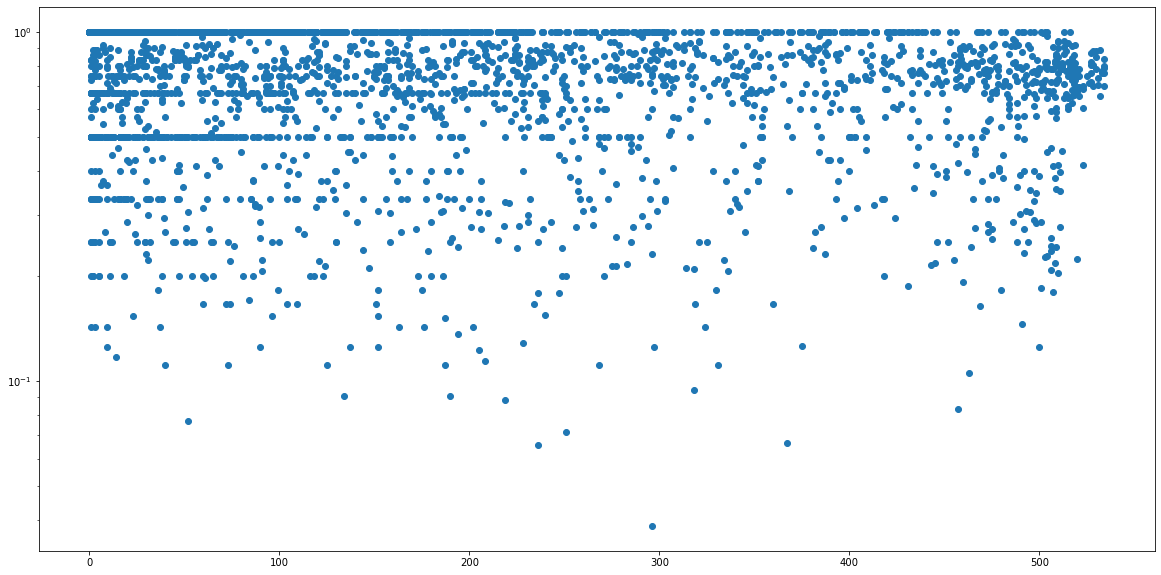

In [26]:
#plt.plot(merged_new['a'],merged_new['Prob'])
#plt.xscale('log')
plt.yscale('log')
plt.scatter(merged_new['a'],merged_new['Prob'])

# IT

In [22]:
data['it1'] = data['it'].loc[data['it']['a']<100] #control the window day=100
data['it1'].head()

ego                alter                pair  \
0  -0x1222339268eeddbd  -0x11dfad3c7336ab5d  0x4a0f1b22243afa25   
1  -0x1222339268eeddbd  -0x13d717c36cb46e90  0x2b9a5bafd88c7828   
2  -0x1222339268eeddbd  -0x13d717c36cb46e90  0x2b9a5bafd88c7828   
3  -0x1222339268eeddbd  -0x13d717c36cb46e90  0x2b9a5bafd88c7828   
4  -0x1222339268eeddbd  -0x1518063fe72efd36  -0x546ee7c17d64a88   

                 time       date    t  tau  a  
0 2013-03-27 17:13:07 2013-03-27   54   54  0  
1 2013-04-27 20:19:15 2013-04-27   85   85  0  
2 2013-05-01 21:28:47 2013-05-01   89   89  4  
3 2013-05-03 19:31:19 2013-05-03   91   91  6  
4 2014-04-08 16:04:08 2014-04-08  431  431  0

In [23]:
data['it1']['weekday'] = data['it1']['tau'].map(lambda x: weekdays['it'][x])#find weekday
a = data['it1'].loc[(data['it1']['a']==0)].drop_duplicates(subset = ['pair'])#find the first dat enter the study
a.rename(columns={'weekday': 'weekday_start'}, inplace=True)
aa=a[['pair','weekday_start']]
merged = pd.merge(data['it1'], aa, left_on='pair', right_on='pair')

In [24]:
pd.options.display.max_rows = None
merged.head(50)

ego                alter                 pair  \
0   -0x1222339268eeddbd  -0x11dfad3c7336ab5d   0x4a0f1b22243afa25   
1   -0x1222339268eeddbd  -0x13d717c36cb46e90   0x2b9a5bafd88c7828   
2   -0x1222339268eeddbd  -0x13d717c36cb46e90   0x2b9a5bafd88c7828   
3   -0x1222339268eeddbd  -0x13d717c36cb46e90   0x2b9a5bafd88c7828   
4   -0x1222339268eeddbd  -0x1518063fe72efd36   -0x546ee7c17d64a88   
5   -0x1222339268eeddbd  -0x15a758fcc01a9b41  -0x1df4d32722ee624c   
6   -0x1222339268eeddbd  -0x15a758fcc01a9b41  -0x1df4d32722ee624c   
7   -0x1222339268eeddbd  -0x15a758fcc01a9b41  -0x1df4d32722ee624c   
8   -0x1222339268eeddbd  -0x18ee59072bb3aa98   0x22e4940362c6d75c   
9   -0x1222339268eeddbd  -0x18f0fe625b515a26  -0x7f038bdcf99992ab   
10  -0x1222339268eeddbd  -0x18fb83bc0cd4a381   0x46b5e2e47798b218   
11  -0x1222339268eeddbd  -0x19bc7f34eb360640  -0x78a3536324a1d226   
12  -0x1222339268eeddbd  -0x1fe5a27612e26226   0x432ea19e51c4b69b   
13  -0x1222339268eeddbd  -0x2064e8f2e6bde650  -0x4521bad99f3b18a6   
14  -0x1222339268eeddbd  -0x214f205118ed2460  -0x2aa328840bcb417b   
15  -0x1222339268eeddbd  -0x214f205118ed2460  -0x2aa328840bcb417b   
16  -0x1222339268eeddbd  -0x21a34f307508a1d0   -0xebe2e1eae97649e   
17  -0x1222339268eeddbd   -0x22b05762c05ff78  -0x17420fa7d819b0c0   
18  -0x1222339268eeddbd  -0x239c1f517775095b  -0x5452f3aab15ec064   
19  -0x1222339268eeddbd  -0x2644420f0af8ac22  -0x3c33673962bdc162   
20  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
21  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
22  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
23  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
24  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
25  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
26  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
27  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
28  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
29  -0x1222339268eeddbd  -0x2776bfca322314c0   0x71c8753eacd8f8ab   
30  -0x1222339268eeddbd  -0x278fa3b9906d6d09  -0x798ae22dd9dd24c2   
31  -0x1222339268eeddbd  -0x279780bd74e8cf24   0x3ad2e12429afaefe   
32  -0x1222339268eeddbd  -0x283189dcfa423723   0x68a382248e70ed42   
33  -0x1222339268eeddbd  -0x28dface53713821d   0x6047d81bfaedad61   
34  -0x1222339268eeddbd  -0x2b79a41e4ed9a3b5  -0x3ae729addd7b3321   
35  -0x1222339268eeddbd  -0x2d5620436e5d3649  -0x7f8abda2bcc24c69   
36  -0x1222339268eeddbd  -0x2d5620436e5d3649  -0x7f8abda2bcc24c69   
37  -0x1222339268eeddbd  -0x2f6acc222e74d8f5   -0x49e3877422fbc5c   
38  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
39  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
40  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
41  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
42  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
43  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
44  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
45  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
46  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
47  -0x1222339268eeddbd  -0x35cdf7beb9883f9d   0x6859f24b7bdec127   
48  -0x1222339268eeddbd  -0x36198bc06c28d58b  -0x490572ff8f51d8fc   
49  -0x1222339268eeddbd  -0x3674e709e931000c  -0x46ea62a66943e37d   

                  time       date    t  tau   a    weekday weekday_start  
0  2013-03-27 17:13:07 2013-03-27   54   54   0  Wednesday     Wednesday  
1  2013-04-27 20:19:15 2013-04-27   85   85   0   Saturday      Saturday  
2  2013-05-01 21:28:47 2013-05-01   89   89   4  Wednesday      Saturday  
3  2013-05-03 19:31:19 2013-05-03   91   91   6     Friday      Saturday  
4  2014-04-08 16:04:08 2014-04-08  431  431   0    Tuesday       Tuesday  
5  2014-06-15 12:30:47 2014-06-15  499  499   0   

In [25]:
merged['weekday_new'] = np.where(merged['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'weekday','weekend')
merged['weekday_start_new'] = np.where(merged['weekday_start'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'weekday','weekend')

In [166]:
pd.options.display.max_rows = None
merged.head(50)

ego                alter                 pair  \
0   -0x1222339268eeddbd  -0x11dfad3c7336ab5d   0x4a0f1b22243afa25   
1   -0x1222339268eeddbd  -0x13d717c36cb46e90   0x2b9a5bafd88c7828   
2   -0x1222339268eeddbd  -0x13d717c36cb46e90   0x2b9a5bafd88c7828   
3   -0x1222339268eeddbd  -0x13d717c36cb46e90   0x2b9a5bafd88c7828   
4   -0x1222339268eeddbd  -0x1518063fe72efd36   -0x546ee7c17d64a88   
5   -0x1222339268eeddbd  -0x15a758fcc01a9b41  -0x1df4d32722ee624c   
6   -0x1222339268eeddbd  -0x15a758fcc01a9b41  -0x1df4d32722ee624c   
7   -0x1222339268eeddbd  -0x15a758fcc01a9b41  -0x1df4d32722ee624c   
8   -0x1222339268eeddbd  -0x18ee59072bb3aa98   0x22e4940362c6d75c   
9   -0x1222339268eeddbd  -0x18f0fe625b515a26  -0x7f038bdcf99992ab   
10  -0x1222339268eeddbd  -0x18fb83bc0cd4a381   0x46b5e2e47798b218   
11  -0x1222339268eeddbd  -0x19bc7f34eb360640  -0x78a3536324a1d226   
12  -0x1222339268eeddbd  -0x1fe5a27612e26226   0x432ea19e51c4b69b   
13  -0x1222339268eeddbd  -0x2064e8f2e6bde650  -0x4521bad99f3b18a6   
14  -0x1222339268eeddbd  -0x214f205118ed2460  -0x2aa328840bcb417b   
15  -0x1222339268eeddbd  -0x214f205118ed2460  -0x2aa328840bcb417b   
16  -0x1222339268eeddbd  -0x21a34f307508a1d0   -0xebe2e1eae97649e   
17  -0x1222339268eeddbd   -0x22b05762c05ff78  -0x17420fa7d819b0c0   
18  -0x1222339268eeddbd  -0x239c1f517775095b  -0x5452f3aab15ec064   
19  -0x1222339268eeddbd  -0x2644420f0af8ac22  -0x3c33673962bdc162   
20  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
21  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
22  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
23  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
24  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
25  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
26  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
27  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
28  -0x1222339268eeddbd  -0x26a79ea13d2c2c5d  -0x76d90efb417fcd71   
29  -0x1222339268eeddbd  -0x2776bfca322314c0   0x71c8753eacd8f8ab   
30  -0x1222339268eeddbd  -0x278fa3b9906d6d09  -0x798ae22dd9dd24c2   
31  -0x1222339268eeddbd  -0x279780bd74e8cf24   0x3ad2e12429afaefe   
32  -0x1222339268eeddbd  -0x283189dcfa423723   0x68a382248e70ed42   
33  -0x1222339268eeddbd  -0x28dface53713821d   0x6047d81bfaedad61   
34  -0x1222339268eeddbd  -0x2b79a41e4ed9a3b5  -0x3ae729addd7b3321   
35  -0x1222339268eeddbd  -0x2d5620436e5d3649  -0x7f8abda2bcc24c69   
36  -0x1222339268eeddbd  -0x2d5620436e5d3649  -0x7f8abda2bcc24c69   
37  -0x1222339268eeddbd  -0x2f6acc222e74d8f5   -0x49e3877422fbc5c   
38  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
39  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
40  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
41  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
42  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
43  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
44  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
45  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
46  -0x1222339268eeddbd  -0x318895b417c4edf7    0xd69110fd6b44275   
47  -0x1222339268eeddbd  -0x35cdf7beb9883f9d   0x6859f24b7bdec127   
48  -0x1222339268eeddbd  -0x36198bc06c28d58b  -0x490572ff8f51d8fc   
49  -0x1222339268eeddbd  -0x3674e709e931000c  -0x46ea62a66943e37d   

                  time       date    t  tau   a    weekday weekday_start  \
0  2013-03-27 17:13:07 2013-03-27   54   54   0  Wednesday     Wednesday   
1  2013-04-27 20:19:15 2013-04-27   85   85   0   Saturday      Saturday   
2  2013-05-01 21:28:47 2013-05-01   89   89   4  Wednesday      Saturday   
3  2013-05-03 19:31:19 2013-05-03   91   91   6     Friday      Saturday   
4  2014-04-08 16:04:08 2014-04-08  431  431   0    Tuesday       Tuesday   
5  2014-06-15 12:30:47 2014-06-15  499  499 

In [26]:
merged.groupby('weekday_start_new').size()

weekday_start_new
weekday    54250
weekend    18721
dtype: int64

In [27]:
merged.groupby(['weekday_start_new','weekday_new']).size()

weekday_start_new  weekday_new
weekday            weekday        45699
                   weekend         8551
weekend            weekday         7972
                   weekend        10749
dtype: int64

In [28]:
from decimal import *
size =merged.groupby(['weekday_start_new','weekday_new']).agg(['count'])
size_t = size['t']


for index, row in size_t.iterrows():
    if index in [('weekday', 'weekday'),('weekend', 'weekday')]:
        row['count']=row['count']/5
    else:
        row['count']=row['count']/2

size_t['Prob'] = ''

sum1 = size_t.loc[size_t.index ==('weekday', 'weekday'),'count'].squeeze()+size_t.loc[size_t.index ==('weekday', 'weekend'),'count'].squeeze()
sum2 = size_t.loc[size_t.index ==('weekend', 'weekday'),'count'].squeeze()+size_t.loc[size_t.index ==('weekend', 'weekend'),'count'].squeeze()

v1 = size_t.loc[size_t.index ==('weekday', 'weekday'),'count']
v2 = size_t.loc[size_t.index ==('weekday', 'weekend'),'count']
v3 = size_t.loc[size_t.index ==('weekend', 'weekday'),'count']
v4 = size_t.loc[size_t.index ==('weekend', 'weekend'),'count']

size_t.loc[size_t.index ==('weekday', 'weekday'),'Prob'] = v1/sum1
size_t.loc[size_t.index ==('weekday', 'weekend'),'Prob'] = v2/sum1
size_t.loc[size_t.index ==('weekend', 'weekday'),'Prob'] = v3/sum2
size_t.loc[size_t.index ==('weekend', 'weekend'),'Prob'] = v4/sum2
       
size_t.head()

count      Prob
weekday_start_new weekday_new                 
weekday           weekday       9139  0.681303
                  weekend       4275  0.318697
weekend           weekday       1594   0.22876
                  weekend       5374   0.77124

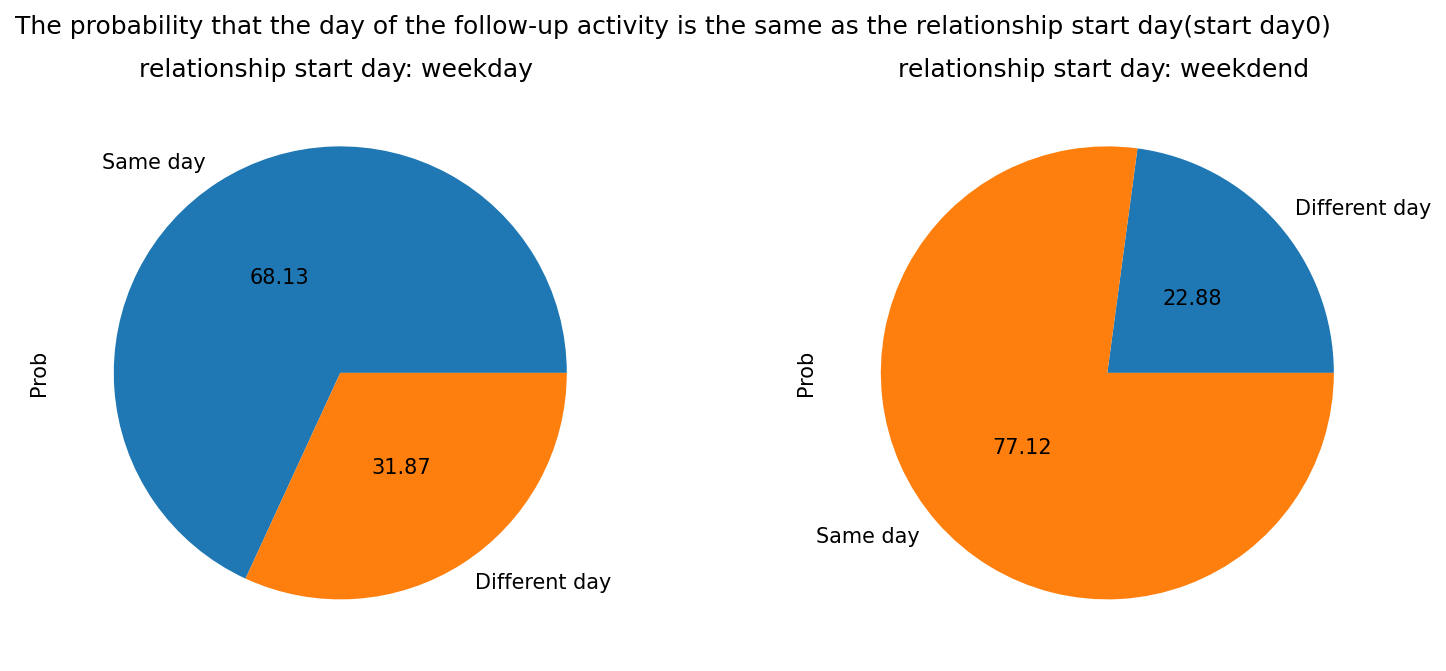

In [29]:
from matplotlib.pyplot import figure

labels1 = ['Same day','Different day'] 
labels2 = ['Different day','Same day'] 
figure(figsize=(30, 30), dpi=150)  
plt.suptitle('The probability that the day of the follow-up activity is the same as the relationship start day(start day0) ',x=1)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.title('relationship start day: weekday ')
size_t.loc[(size_t.index == ('weekday', 'weekday')) | (size_t.index ==('weekday', 'weekend')),'Prob'].plot.pie(y='Prob', figsize=(5, 5),  labels = labels1, autopct='%.2f', pctdistance=0.5, labeldistance=1.1)

plt.subplot(1, 2, 2) # index 2
size_t.loc[(size_t.index == ('weekend', 'weekday')) | (size_t.index ==('weekend', 'weekend')),'Prob'].plot.pie(y='Prob', figsize=(5, 5), labels = labels2,autopct='%.2f', pctdistance=0.5, labeldistance=1.1)
plt.title('relationship start day: weekdend ')

plt.subplots_adjust(right = 2)
plt.show()

In [33]:
r1, r2 = size_t.iloc[2], size_t.iloc[3]
temp = size_t.iloc[2].copy()
size_t.iloc[2] = r2
size_t.iloc[3] = temp
size_t.head()

count      Prob
weekday_start_new weekday_new                 
weekday           weekday       9139  0.681303
                  weekend       4275  0.318697
weekend           weekday       5374   0.77124
                  weekend       1594   0.22876

In [34]:
def addlabels1(y):
    for i in ind:
        plt.text(i,y[i]/2,round(y[i], 2))

In [35]:
def addlabels2(y):
    for i in ind:
        plt.text(i+width,y[i]/2,round(y[i], 2))

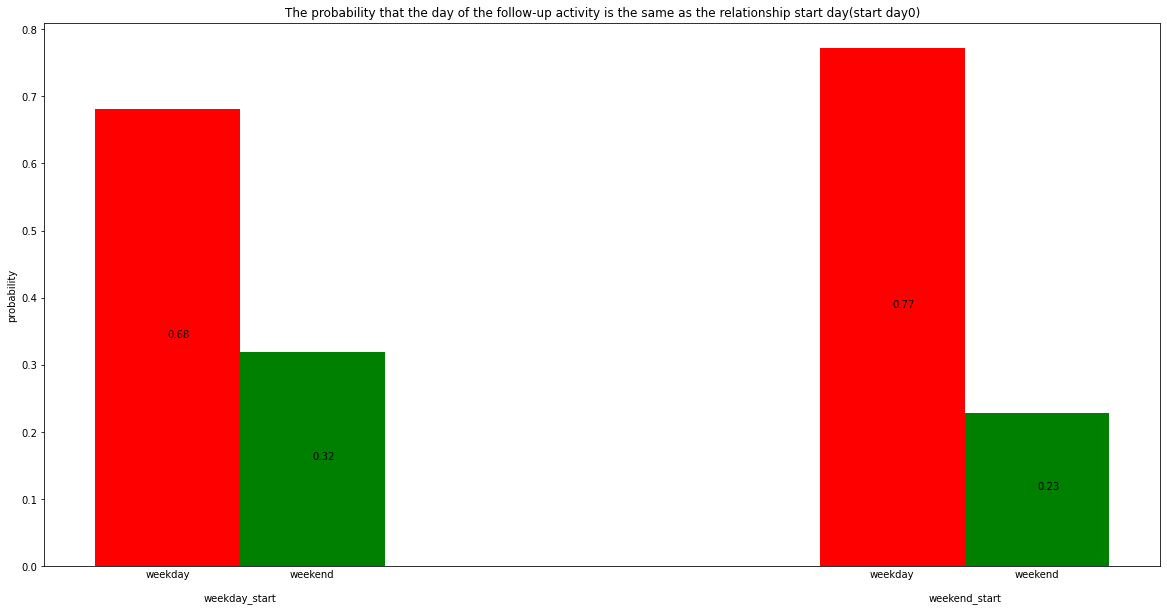

In [36]:
ind = np.arange(2)
width = .2 

x = list()
# x labels position: i = 1st bar, i+w/2 = category, i+w = 2nd bar
for i in ind:
    x.extend([i, i+width/2., i+width])   
 
# plot bars
fig = plt.figure()
ax = fig.add_subplot(111)
y_1 = list(size_t.loc[(size_t.index == ('weekday', 'weekday')) | (size_t.index ==('weekend', 'weekday')),'Prob'])
y_2 = list(size_t.loc[(size_t.index == ('weekend', 'weekend')) | (size_t.index ==('weekday', 'weekend')),'Prob'])
rects1 = ax.bar(ind, y_1, width, color='r', align = 'center')
rects2 = ax.bar(ind+width, y_2, width, color='g', align = 'center')
plt.title('The probability that the day of the follow-up activity is the same as the relationship start day(start day0)')
# set ticks and labels
plt.xticks(x)
plt.ylabel('probability')
ax.set_xticklabels(('weekday','\n\nweekday_start', 'weekend', 'weekday','\n\nweekend_start', 'weekend'),ha='center')
# hide tick lines for x axis
ax.tick_params(axis='x', which='both',length=0)
addlabels1(y = y_1)
addlabels2(y = y_2)
plt.show()

# IT200

In [37]:
b = a.loc[a['t'] >=200,'pair']
merged_new = merged[merged['pair'].isin(b)]
merged_new.head()

ego                alter                 pair  \
4  -0x1222339268eeddbd  -0x1518063fe72efd36   -0x546ee7c17d64a88   
5  -0x1222339268eeddbd  -0x15a758fcc01a9b41  -0x1df4d32722ee624c   
6  -0x1222339268eeddbd  -0x15a758fcc01a9b41  -0x1df4d32722ee624c   
7  -0x1222339268eeddbd  -0x15a758fcc01a9b41  -0x1df4d32722ee624c   
8  -0x1222339268eeddbd  -0x18ee59072bb3aa98   0x22e4940362c6d75c   

                 time       date    t  tau  a   weekday weekday_start  \
4 2014-04-08 16:04:08 2014-04-08  431  431  0   Tuesday       Tuesday   
5 2014-06-15 12:30:47 2014-06-15  499  499  0    Sunday        Sunday   
6 2014-06-15 12:39:25 2014-06-15  499  499  0    Sunday        Sunday   
7 2014-06-15 12:49:44 2014-06-15  499  499  0    Sunday        Sunday   
8 2014-10-16 12:54:08 2014-10-16  622  622  0  Thursday      Thursday   

  weekday_new weekday_start_new  
4     weekday           weekday  
5     weekend           weekend  
6     weekend           weekend  
7     weekend           weekend  
8     weekday           weekday

In [38]:
merged_new.groupby('weekday_start_new').size()

weekday_start_new
weekday    34360
weekend    11939
dtype: int64

In [39]:
merged_new.groupby(['weekday_start_new','weekday_new']).size()

weekday_start_new  weekday_new
weekday            weekday        29284
                   weekend         5076
weekend            weekday         4562
                   weekend         7377
dtype: int64

In [40]:
from decimal import *
size =merged_new.groupby(['weekday_start_new','weekday_new']).agg(['count'])
size_t = size['t']


for index, row in size_t.iterrows():
    if index in [('weekday', 'weekday'),('weekend', 'weekday')]:
        row['count']=row['count']/5
    else:
        row['count']=row['count']/2

size_t['Prob'] = ''

sum1 = size_t.loc[size_t.index ==('weekday', 'weekday'),'count'].squeeze()+size_t.loc[size_t.index ==('weekday', 'weekend'),'count'].squeeze()
sum2 = size_t.loc[size_t.index ==('weekend', 'weekday'),'count'].squeeze()+size_t.loc[size_t.index ==('weekend', 'weekend'),'count'].squeeze()

v1 = size_t.loc[size_t.index ==('weekday', 'weekday'),'count']
v2 = size_t.loc[size_t.index ==('weekday', 'weekend'),'count']
v3 = size_t.loc[size_t.index ==('weekend', 'weekday'),'count']
v4 = size_t.loc[size_t.index ==('weekend', 'weekend'),'count']

size_t.loc[size_t.index ==('weekday', 'weekday'),'Prob'] = v1/sum1
size_t.loc[size_t.index ==('weekday', 'weekend'),'Prob'] = v2/sum1
size_t.loc[size_t.index ==('weekend', 'weekday'),'Prob'] = v3/sum2
size_t.loc[size_t.index ==('weekend', 'weekend'),'Prob'] = v4/sum2
       
size_t.head()

count      Prob
weekday_start_new weekday_new                 
weekday           weekday       5856  0.697641
                  weekend       2538  0.302359
weekend           weekday        912  0.198261
                  weekend       3688  0.801739

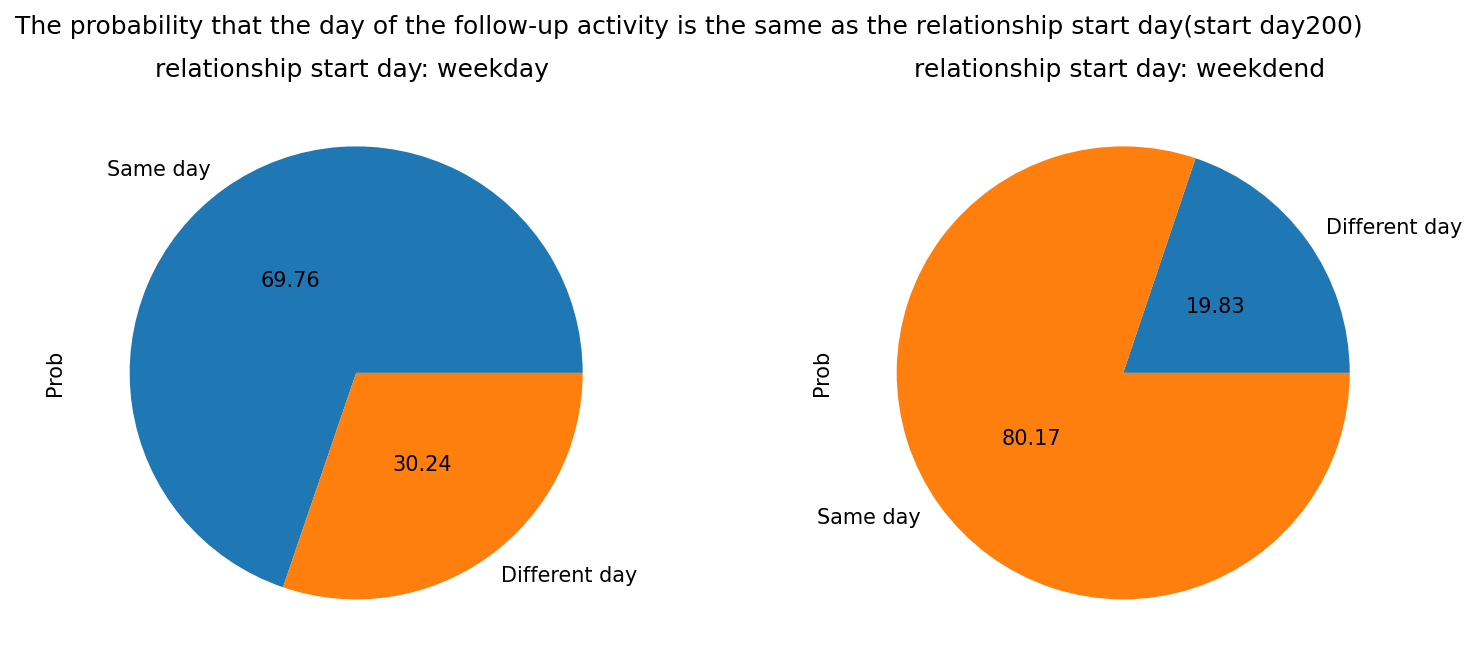

In [41]:
from matplotlib.pyplot import figure

labels1 = ['Same day','Different day'] 
labels2 = ['Different day','Same day'] 
figure(figsize=(30, 30), dpi=150)  
plt.suptitle('The probability that the day of the follow-up activity is the same as the relationship start day(start day200) ',x=1)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.title('relationship start day: weekday ')
size_t.loc[(size_t.index == ('weekday', 'weekday')) | (size_t.index ==('weekday', 'weekend')),'Prob'].plot.pie(y='Prob', figsize=(5, 5),  labels = labels1, autopct='%.2f', pctdistance=0.5, labeldistance=1.1)

plt.subplot(1, 2, 2) # index 2
size_t.loc[(size_t.index == ('weekend', 'weekday')) | (size_t.index ==('weekend', 'weekend')),'Prob'].plot.pie(y='Prob', figsize=(5, 5), labels = labels2,autopct='%.2f', pctdistance=0.5, labeldistance=1.1)
plt.title('relationship start day: weekdend ')

plt.subplots_adjust(right = 2)
plt.show()

In [42]:
r1, r2 = size_t.iloc[2], size_t.iloc[3]
temp = size_t.iloc[2].copy()
size_t.iloc[2] = r2
size_t.iloc[3] = temp
size_t.head()

count      Prob
weekday_start_new weekday_new                 
weekday           weekday       5856  0.697641
                  weekend       2538  0.302359
weekend           weekday       3688  0.801739
                  weekend        912  0.198261

In [43]:
def addlabels1(y):
    for i in ind:
        plt.text(i,y[i]/2,round(y[i], 2))

In [44]:
def addlabels2(y):
    for i in ind:
        plt.text(i+width,y[i]/2,round(y[i], 2))

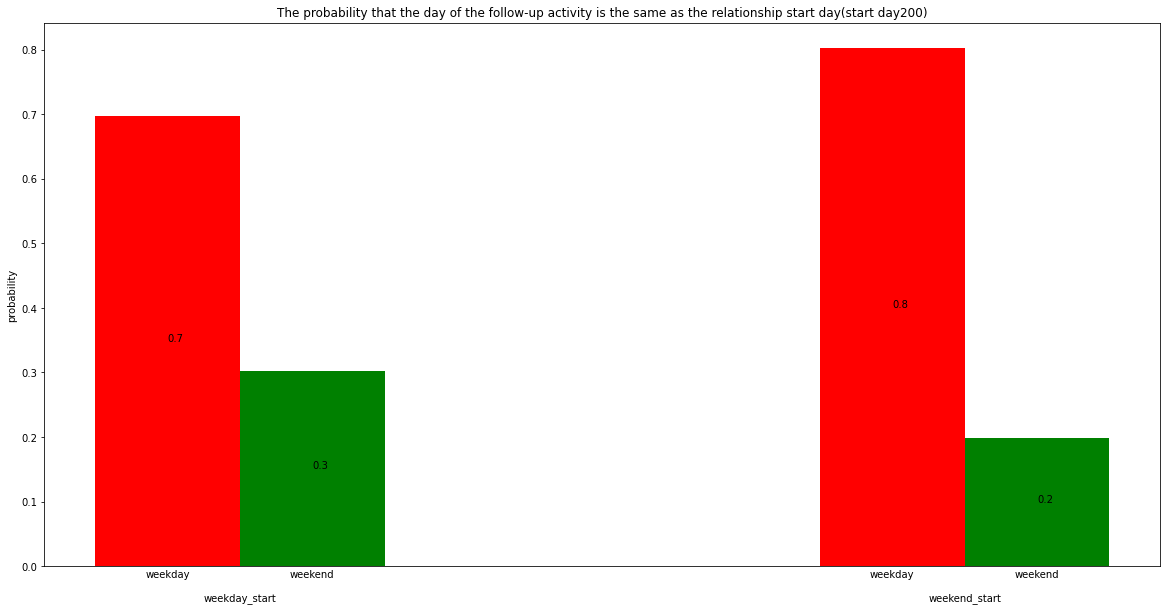

In [45]:
ind = np.arange(2)
width = .2 

x = list()
# x labels position: i = 1st bar, i+w/2 = category, i+w = 2nd bar
for i in ind:
    x.extend([i, i+width/2., i+width])   
 
# plot bars
fig = plt.figure()
ax = fig.add_subplot(111)
y_1 = list(size_t.loc[(size_t.index == ('weekday', 'weekday')) | (size_t.index ==('weekend', 'weekday')),'Prob'])
y_2 = list(size_t.loc[(size_t.index == ('weekend', 'weekend')) | (size_t.index ==('weekday', 'weekend')),'Prob'])
rects1 = ax.bar(ind, y_1, width, color='r', align = 'center')
rects2 = ax.bar(ind+width, y_2, width, color='g', align = 'center')
plt.title('The probability that the day of the follow-up activity is the same as the relationship start day(start day200)')
# set ticks and labels
plt.xticks(x)
plt.ylabel('probability')
ax.set_xticklabels(('weekday','\n\nweekday_start', 'weekend', 'weekday','\n\nweekend_start', 'weekend'),ha='center')
# hide tick lines for x axis
ax.tick_params(axis='x', which='both',length=0)
addlabels1(y = y_1)
addlabels2(y = y_2)
plt.show()

In [106]:
data['ukc'].describe()

t              a
count  107542.000000  107542.000000
mean      274.586924     174.859934
std       147.960225     151.946838
min         0.000000       0.000000
25%       160.000000      36.000000
50%       274.000000     145.000000
75%       404.000000     280.000000
max       545.000000     534.000000

In [109]:
data['ukc']['weekday'] = data['ukc']['t'].map(lambda x: weekdays['ukc'][x])#find weekday
a = data['ukc'].loc[(data['ukc']['a']==0)].drop_duplicates(subset = ['pair'])#find the first dat enter the study
a.rename(columns={'weekday': 'weekday_start'}, inplace=True)
aa=a[['pair','weekday_start']]
merged = pd.merge(data['ukc'], aa, left_on='pair', right_on='pair')

In [110]:
merged['weekday_new'] = np.where(merged['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'weekday','weekend')
merged['weekday_start_new'] = np.where(merged['weekday_start'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'weekday','weekend')

In [111]:
merged.head()

ego                alter                 pair  \
0  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
1  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
2  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
3  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   
4  -0x2670406d6ac46a4e  -0x1221a7b3adb1c6ed  -0x2a416cf8a6fa235d   

                 time       date    t  a   weekday weekday_start weekday_new  \
0 2007-09-28 22:19:00 2007-09-28  207  0    Friday        Friday     weekday   
1 2007-09-29 20:14:00 2007-09-29  208  1  Saturday        Friday     weekend   
2 2007-09-30 19:43:00 2007-09-30  209  2    Sunday        Friday     weekend   
3 2007-09-30 19:48:00 2007-09-30  209  2    Sunday        Friday     weekend   
4 2007-09-30 19:48:00 2007-09-30  209  2    Sunday        Friday     weekend   

  weekday_start_new  
0           weekday  
1           weekday  
2           weekday  
3           weekday  
4           weekday

In [112]:
merged.loc[merged['a']==534]

ego                alter                 pair  \
30792  -0x6c9e47962828159a   0x695882dc31549395   0x40fad03796585169   
47045   -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
47046   -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
87685   0x6b4f0e85a382726b   -0x7a36ee4e06bebe9   0x100db398ccf786a8   
92938   0x6b4f0e85a382726b   -0xea397368630161e   0x39cff08db225f818   
92939   0x6b4f0e85a382726b   -0xea397368630161e   0x39cff08db225f818   
92940   0x6b4f0e85a382726b   -0xea397368630161e   0x39cff08db225f818   
92941   0x6b4f0e85a382726b   -0xea397368630161e   0x39cff08db225f818   
92942   0x6b4f0e85a382726b   -0xea397368630161e   0x39cff08db225f818   
92943   0x6b4f0e85a382726b   -0xea397368630161e   0x39cff08db225f818   
92944   0x6b4f0e85a382726b   -0xea397368630161e   0x39cff08db225f818   
92945   0x6b4f0e85a382726b   -0xea397368630161e   0x39cff08db225f818   
92946   0x6b4f0e85a382726b   -0xea397368630161e   0x39cff08db225f818   
92947   0x6b4f0e85a382726b   -0xea397368630161e   0x39cff08db225f818   
95051   0x6b4f0e85a382726b   0x6f92d6f091f5435a  -0x73bf99b5e2fab511   
95052   0x6b4f0e85a382726b   0x6f92d6f091f5435a  -0x73bf99b5e2fab511   

                     time       date    t    a    weekday weekday_start  \
30792 2008-08-21 14:56:00 2008-08-21  535  534   Thursday       Tuesday   
47045 2008-08-21 00:22:00 2008-08-21  535  534   Thursday       Tuesday   
47046 2008-08-21 09:12:00 2008-08-21  535  534   Thursday       Tuesday   
87685 2008-08-21 18:11:00 2008-08-21  535  534   Thursday       Tuesday   
92938 2008-08-21 08:47:00 2008-08-21  535  534   Thursday       Tuesday   
92939 2008-08-21 08:59:00 2008-08-21  535  534   Thursday       Tuesday   
92940 2008-08-21 09:24:00 2008-08-21  535  534   Thursday       Tuesday   
92941 2008-08-21 09:25:00 2008-08-21  535  534   Thursday       Tuesday   
92942 2008-08-21 09:32:00 2008-08-21  535  534   Thursday       Tuesday   
92943 2008-08-21 12:19:00 2008-08-21  535  534   Thursday       Tuesday   
92944 2008-08-21 18:09:00 2008-08-21  535  534   Thursday       Tuesday   
92945 2008-08-21 20:06:00 2008-08-21  535  534   Thursday       Tuesday   
92946 2008-08-21 20:09:00 2008-08-21  535  534   Thursday       Tuesday   
92947 2008-08-21 20:30:00 2008-08-21  535  534   Thursday       Tuesday   
95051 2008-08-20 12:06:00 2008-08-20  534  534  Wednesday        Monday   
95052 2008-08-20 22:01:00 2008-08-20  534  534  Wednesday        Monday   

      weekday_new weekday_start_new  
30792     weekday           weekday  
47045     weekday           weekday  
47046     weekday           weekday  
87685     weekday           weekday  
92938     weekday           weekday  
92939     weekday           weekday  
92940     weekday           weekday  
92941     weekday           weekday  
92942     weekday           weekday  
92943     weekday           weekday  
92944     weekday           weekday  
92945     weekday           weekday  
92946     weekday           weekday  
92947     weekday           weekday  
95051     weekday           weekday  
95052     weekday           weekday

In [121]:
# pick first person
merged1 = merged.loc[merged['pair']=='0x40fad03796585169']
merged1

ego               alter                pair  \
30526  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30527  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30528  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30529  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30530  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30531  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30532  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30533  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30534  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30535  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30536  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30537  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30538  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30539  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30540  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30541  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30542  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30543  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30544  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30545  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30546  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30547  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30548  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30549  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30550  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30551  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30552  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30553  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30554  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30555  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30556  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30557  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30558  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30559  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30560  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30561  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30562  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30563  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30564  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30565  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30566  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30567  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30568  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30569  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30570  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30571  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30572  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30573  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30574  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30575  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30576  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30577  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30578  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30579  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30580  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30581  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30582  -0x6c9e47962828159a  0x695

In [124]:
#merged1["same day"] = pd.NaT
for index, row in merged1.iterrows():
    if row['weekday_new'] == row['weekday_start_new']:
        row['same day'] =1
    else:
        row['same day'] =0

merged1

ego               alter                pair  \
30526  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30527  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30528  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30529  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30530  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30531  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30532  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30533  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30534  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30535  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30536  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30537  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30538  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30539  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30540  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30541  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30542  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30543  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30544  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30545  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30546  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30547  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30548  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30549  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30550  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30551  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30552  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30553  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30554  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30555  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30556  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30557  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30558  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30559  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30560  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30561  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30562  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30563  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30564  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30565  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30566  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30567  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30568  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30569  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30570  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30571  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30572  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30573  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30574  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30575  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30576  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30577  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30578  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30579  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30580  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30581  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30582  -0x6c9e47962828159a  0x695

In [128]:
# create a list of our conditions
conditions = [
    merged1['weekday_new'] == merged1['weekday_start_new'],
    merged1['weekday_new'] != merged1['weekday_start_new']
    ]

# create a list of the values we want to assign for each condition
values = ['Yes','No']

# create a new column and use np.select to assign values to it using our lists as arguments
merged1['same day'] = np.select(conditions, values)

# display updated DataFrame
merged1.head()

ego               alter                pair  \
30526  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30527  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30528  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30529  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   
30530  -0x6c9e47962828159a  0x695882dc31549395  0x40fad03796585169   

                     time       date   t   a    weekday weekday_start  \
30526 2007-03-06 15:29:00 2007-03-06   1   0    Tuesday       Tuesday   
30527 2007-03-07 18:03:00 2007-03-07   2   1  Wednesday       Tuesday   
30528 2007-03-07 18:04:00 2007-03-07   2   1  Wednesday       Tuesday   
30529 2007-03-07 19:26:00 2007-03-07   2   1  Wednesday       Tuesday   
30530 2007-03-22 15:00:00 2007-03-22  17  16   Thursday       Tuesday   

      weekday_new weekday_start_new same day  
30526     weekday           weekday      Yes  
30527     weekday           weekday      Yes  
30528     weekday           weekday      Yes  
30529     weekday           weekday      Yes  
30530     weekday           weekday      Yes

In [131]:
merged1['same day'].value_counts()

Yes    224
No      43
Name: same day, dtype: int64

In [134]:
merged1['same day'].value_counts(normalize=True) * 100

Yes    83.895131
No     16.104869
Name: same day, dtype: float64

In [135]:
# pick second person
merged1 = merged.loc[merged['pair']=='-0x32063f35c6e63b1a']
merged1

ego                alter                 pair  \
46391  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46392  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46393  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46394  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46395  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46396  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46397  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46398  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46399  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46400  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46401  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46402  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46403  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46404  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46405  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46406  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46407  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46408  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46409  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46410  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46411  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46412  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46413  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46414  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46415  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46416  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46417  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46418  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46419  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46420  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46421  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46422  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46423  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46424  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46425  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46426  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46427  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46428  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46429  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46430  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46431  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46432  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46433  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46434  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46435  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46436  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46437  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46438  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46439  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46440  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46441  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46442  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46443  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46444  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46445  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46446  -0xea397368630161e  -0x597cecb4f88ec7f2

In [136]:
# create a list of our conditions
conditions = [
    merged1['weekday_new'] == merged1['weekday_start_new'],
    merged1['weekday_new'] != merged1['weekday_start_new']
    ]

# create a list of the values we want to assign for each condition
values = ['Yes','No']

# create a new column and use np.select to assign values to it using our lists as arguments
merged1['same day'] = np.select(conditions, values)

# display updated DataFrame
merged1.head()

ego                alter                 pair  \
46391  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46392  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46393  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46394  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   
46395  -0xea397368630161e  -0x597cecb4f88ec7f2  -0x32063f35c6e63b1a   

                     time       date   t   a  weekday weekday_start  \
46391 2007-03-06 11:08:00 2007-03-06   1   0  Tuesday       Tuesday   
46392 2007-03-16 00:40:00 2007-03-16  11  10   Friday       Tuesday   
46393 2007-03-25 22:52:00 2007-03-25  20  19   Sunday       Tuesday   
46394 2007-03-25 22:54:00 2007-03-25  20  19   Sunday       Tuesday   
46395 2007-03-25 23:10:00 2007-03-25  20  19   Sunday       Tuesday   

      weekday_new weekday_start_new same day  
46391     weekday           weekday      Yes  
46392     weekday           weekday      Yes  
46393     weekend           weekday       No  
46394     weekend           weekday       No  
46395     weekend           weekday       No

In [137]:
merged1['same day'].value_counts()

Yes    525
No     131
Name: same day, dtype: int64

In [138]:
merged1['same day'].value_counts(normalize=True) * 100

Yes    80.030488
No     19.969512
Name: same day, dtype: float64

In [139]:
data['it'].describe()

t            tau              a
count  186965.000000  186965.000000  186965.000000
mean      393.182414     275.092627     198.991480
std       187.206805     181.441801     182.017745
min         0.000000       0.000000       0.000000
25%       255.000000     122.000000      34.000000
50%       411.000000     252.000000     157.000000
75%       546.000000     400.000000     323.000000
max       698.000000     698.000000     698.000000

In [146]:
data['it']['weekday'] = data['it']['tau'].map(lambda x: weekdays['it'][x])#find weekday
a = data['it'].loc[(data['it']['a']==0)].drop_duplicates(subset = ['pair'])#find the first dat enter the study
a.rename(columns={'weekday': 'weekday_start'}, inplace=True)
aa=a[['pair','weekday_start']]
merged = pd.merge(data['it'], aa, left_on='pair', right_on='pair')

In [147]:
merged['weekday_new'] = np.where(merged['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'weekday','weekend')
merged['weekday_start_new'] = np.where(merged['weekday_start'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'weekday','weekend')

In [149]:
merged.loc[merged['a']==698].head()

ego                alter                 pair  \
1769   -0x1222339268eeddbd   0x5f7504977717da52  -0x6c4055e0276f44d5   
37794  -0x3cf238b180011177   0x23fba3f8b4dc9e66   0x369265314041ab59   
49905  -0x50608497018cc470  -0x1e87ae52beee64f8   0x13fee9bf51f28201   
49906  -0x50608497018cc470  -0x1e87ae52beee64f8   0x13fee9bf51f28201   
50699  -0x50608497018cc470  -0x6c87fed7ef392fcb   0x42944de63aa70b97   

                     time       date    t  tau    a    weekday weekday_start  \
1769  2014-12-31 15:04:18 2014-12-31  698  698  698  Wednesday        Friday   
37794 2014-12-31 13:22:39 2014-12-31  698  698  698  Wednesday        Friday   
49905 2014-12-31 14:28:24 2014-12-31  698  698  698  Wednesday        Friday   
49906 2014-12-31 18:46:45 2014-12-31  698  698  698  Wednesday        Friday   
50699 2014-12-31 08:38:49 2014-12-31  698  698  698  Wednesday        Friday   

      weekday_new weekday_start_new  
1769      weekday           weekday  
37794     weekday           weekday  
49905     weekday           weekday  
49906     weekday           weekday  
50699     weekday           weekday

In [150]:
# pick first person
merged1 = merged.loc[merged['pair']=='-0x6c4055e0276f44d5']
merged1

ego               alter                 pair  \
973   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
974   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
975   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
976   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
977   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
978   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
979   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
980   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
981   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
982   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
983   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
984   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
985   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
986   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
987   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
988   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
989   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
990   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
991   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
992   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
993   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
994   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
995   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
996   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
997   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
998   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
999   -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1000  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1001  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1002  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1003  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1004  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1005  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1006  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1007  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1008  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1009  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1010  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1011  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1012  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1013  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1014  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1015  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1016  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1017  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1018  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1019  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1020  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1021  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1022  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1023  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1024  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1025  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1026  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1027  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1028  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
1029  -0x1222339268eeddbd  0x5f7

In [151]:
# create a list of our conditions
conditions = [
    merged1['weekday_new'] == merged1['weekday_start_new'],
    merged1['weekday_new'] != merged1['weekday_start_new']
    ]

# create a list of the values we want to assign for each condition
values = ['Yes','No']

# create a new column and use np.select to assign values to it using our lists as arguments
merged1['same day'] = np.select(conditions, values)

# display updated DataFrame
merged1.head()

ego               alter                 pair  \
973  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
974  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
975  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
976  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   
977  -0x1222339268eeddbd  0x5f7504977717da52  -0x6c4055e0276f44d5   

                   time       date  t  tau  a   weekday weekday_start  \
973 2013-02-01 16:19:32 2013-02-01  0    0  0    Friday        Friday   
974 2013-02-01 18:14:27 2013-02-01  0    0  0    Friday        Friday   
975 2013-02-01 18:33:57 2013-02-01  0    0  0    Friday        Friday   
976 2013-02-02 19:55:23 2013-02-02  1    1  1  Saturday        Friday   
977 2013-02-04 12:25:57 2013-02-04  3    3  3    Monday        Friday   

    weekday_new weekday_start_new same day  
973     weekday           weekday      Yes  
974     weekday           weekday      Yes  
975     weekday           weekday      Yes  
976     weekend           weekday       No  
977     weekday           weekday      Yes

In [152]:
merged1['same day'].value_counts()

Yes    670
No     127
Name: same day, dtype: int64

In [153]:
merged1['same day'].value_counts(normalize=True) * 100

Yes    84.065245
No     15.934755
Name: same day, dtype: float64

In [154]:
# pick second person
merged1 = merged.loc[merged['pair']=='0x369265314041ab59']
merged1

ego               alter                pair  \
36524  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36525  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36526  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36527  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36528  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36529  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36530  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36531  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36532  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36533  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36534  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36535  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36536  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36537  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36538  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36539  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36540  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36541  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36542  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36543  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36544  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36545  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36546  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36547  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36548  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36549  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36550  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36551  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36552  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36553  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36554  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36555  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36556  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36557  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36558  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36559  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36560  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36561  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36562  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36563  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36564  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36565  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36566  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36567  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36568  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36569  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36570  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36571  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36572  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36573  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36574  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36575  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36576  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36577  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36578  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36579  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36580  -0x3cf238b180011177  0x23f

In [155]:
# create a list of our conditions
conditions = [
    merged1['weekday_new'] == merged1['weekday_start_new'],
    merged1['weekday_new'] != merged1['weekday_start_new']
    ]

# create a list of the values we want to assign for each condition
values = ['Yes','No']

# create a new column and use np.select to assign values to it using our lists as arguments
merged1['same day'] = np.select(conditions, values)

# display updated DataFrame
merged1.head()

ego               alter                pair  \
36524  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36525  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36526  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36527  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   
36528  -0x3cf238b180011177  0x23fba3f8b4dc9e66  0x369265314041ab59   

                     time       date  t  tau  a    weekday weekday_start  \
36524 2013-02-01 16:08:02 2013-02-01  0    0  0     Friday        Friday   
36525 2013-02-06 15:41:06 2013-02-06  5    5  5  Wednesday        Friday   
36526 2013-02-06 19:35:03 2013-02-06  5    5  5  Wednesday        Friday   
36527 2013-02-08 08:08:07 2013-02-08  7    7  7     Friday        Friday   
36528 2013-02-08 08:17:07 2013-02-08  7    7  7     Friday        Friday   

      weekday_new weekday_start_new same day  
36524     weekday           weekday      Yes  
36525     weekday           weekday      Yes  
36526     weekday           weekday      Yes  
36527     weekday           weekday      Yes  
36528     weekday           weekday      Yes

In [156]:
merged1['same day'].value_counts()

Yes    1043
No      228
Name: same day, dtype: int64

In [157]:
merged1['same day'].value_counts(normalize=True) * 100

Yes    82.061369
No     17.938631
Name: same day, dtype: float64